In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data

In [2]:
df = pd.read_csv('diabetes_dataset__2019.csv')
df.head()

,Age,Gender,Family_Diabetes,highBP,PhysicallyActive,BMI,Smoking,Alcohol,Sleep,SoundSleep,RegularMedicine,JunkFood,Stress,BPLevel,Pregancies,Pdiabetes,UriationFreq,Diabetic
0,50-59,Male,no,yes,one hr or more,39.0,no,no,8,6,no,occasionally,sometimes,high,0.0,0,not much,no
1,50-59,Male,no,yes,less than half an hr,28.0,no,no,8,6,yes,very often,sometimes,normal,0.0,0,not much,no
2,40-49,Male,no,no,one hr or more,24.0,no,no,6,6,no,occasionally,sometimes,normal,0.0,0,not much,no
3,50-59,Male,no,no,one hr or more,23.0,no,no,8,6,no,occasionally,sometimes,normal,0.0,0,not much,no
4,40-49,Male,no,no,less than half an hr,27.0,no,no,8,8,no,occasionally,sometimes,normal,0.0,0,not much,no


In [3]:
df.shape

(952, 18)

In [4]:
df.dtypes

Age                  object
Gender               object
Family_Diabetes      object
highBP               object
PhysicallyActive     object
BMI                 float64
Smoking              object
Alcohol              object
Sleep                 int64
SoundSleep            int64
RegularMedicine      object
JunkFood             object
Stress               object
BPLevel              object
Pregancies          float64
Pdiabetes            object
UriationFreq         object
Diabetic             object
dtype: object

# Define business problem

We want to know given all the features whether the person has risk to develop diabetes type 2 or not. Our target variable is then 'Diabetic'

In [5]:
target = 'Diabetic'

In [6]:
df[target].value_counts()/len(df)

no     0.718487
yes    0.279412
 no    0.001050
Name: Diabetic, dtype: float64

/Users/charlotteabitbol/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


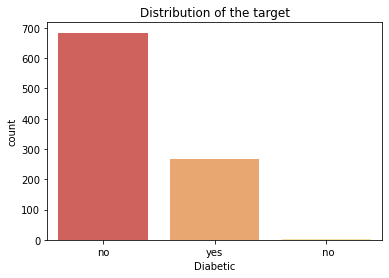

In [7]:
with sns.color_palette('Spectral'):
    sns.countplot(df[target])
    plt.title('Distribution of the target')
    plt.show()

One entry was wrong (additional space) but we can see that the dataset is a bit unbalanced but we can work with that.
We'll need to transform our target feature (encode it and take care of the outlier)

In [8]:
df[target] = df[target].replace(' no', 'no')

# EDA

In [9]:
df.describe()

,BMI,Sleep,SoundSleep,Pregancies
count,948.000000,952.000000,952.000000,910.000000
mean,25.763713,6.949580,5.495798,0.386813
std,5.402595,1.273189,1.865618,0.909455
min,15.000000,4.000000,0.000000,0.000000
25%,22.000000,6.000000,4.000000,0.000000
50%,25.000000,7.000000,6.000000,0.000000
75%,29.000000,8.000000,7.000000,0.000000
max,45.000000,11.000000,11.000000,4.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 952 entries, 0 to 951
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               952 non-null    object 
 1   Gender            952 non-null    object 
 2   Family_Diabetes   952 non-null    object 
 3   highBP            952 non-null    object 
 4   PhysicallyActive  952 non-null    object 
 5   BMI               948 non-null    float64
 6   Smoking           952 non-null    object 
 7   Alcohol           952 non-null    object 
 8   Sleep             952 non-null    int64  
 9   SoundSleep        952 non-null    int64  
 10  RegularMedicine   952 non-null    object 
 11  JunkFood          952 non-null    object 
 12  Stress            952 non-null    object 
 13  BPLevel           952 non-null    object 
 14  Pregancies        910 non-null    float64
 15  Pdiabetes         951 non-null    object 
 16  UriationFreq      952 non-null    object 
 1

In [11]:
features = [x for x in df.columns if x!= target]

In [12]:
num_features = df.describe().columns
num_features

Index(['BMI', 'Sleep', 'SoundSleep', 'Pregancies'], dtype='object')

In [13]:
df['SoundSleep'].value_counts()

6     228
4     188
5     156
8     120
7     104
3      68
2      44
9      16
10     16
0       4
1       4
11      4
Name: SoundSleep, dtype: int64

In [14]:
cat_features = [x for x in features if x not in num_features]

In [15]:
for feature in cat_features:
    print(feature,'\n',df[feature].value_counts(), '\n')

Age 
 less than 40    488
40-49           164
50-59           156
60 or older     144
Name: Age, dtype: int64 

Gender 
 Male      580
Female    372
Name: Gender, dtype: int64 

Family_Diabetes 
 no     498
yes    454
Name: Family_Diabetes, dtype: int64 

highBP 
 no     724
yes    228
Name: highBP, dtype: int64 

PhysicallyActive 
 less than half an hr    336
more than half an hr    272
one hr or more          212
none                    132
Name: PhysicallyActive, dtype: int64 

Smoking 
 no     844
yes    108
Name: Smoking, dtype: int64 

Alcohol 
 no     760
yes    192
Name: Alcohol, dtype: int64 

RegularMedicine 
 no     615
yes    336
o        1
Name: RegularMedicine, dtype: int64 

JunkFood 
 occasionally    672
often           184
very often       52
always           44
Name: JunkFood, dtype: int64 

Stress 
 sometimes     564
very often    164
not at all    136
always         88
Name: Stress, dtype: int64 

BPLevel 
 normal     707
high       211
low         25
High         5

- categorical ordinal : age, PhysicallyActive, JunkFood, Stress, BPLevel, UriationFreq
- categorical nominal : gender, family_diabetes(binary), highBP (binary), Smoking (binary), Alcohol (binary), Pdiabetes, RegularMedicine (binary), 
- numerical continuous : BMI
- numerical discrete : Sleep, SoundSleep, Pregancies

In [16]:
def basic_eda(df, target):
    """
    author: Daniel Siles and Charlotte Abitbol
    date: 24/12/2020
    """
    TARGET = target
    display(df.head())
    display(df.shape)
    print('Does the dataset contain NA? What are the datatypes')
    display(df.info())
    print('Summary statistics')
    display(df.describe(include="all"))
    features = df.columns
    print(f'List of features:{features}')
    num_features = df.describe().columns
    print(f'Numerical features:{num_features}')
    cat_features = [x for x in features if x not in num_features]
    print(f'Categorical features{cat_features}')
    print()
    with sns.color_palette('Spectral'):
        for feature in num_features:
            plt.figure(figsize=(12,6))
            plt.title(f"Distribution of {feature}")
            sns.distplot(df[feature])
            plt.show()
        for feature in cat_features:
            plt.figure(figsize=(12,6))
            plt.title(f"Distribution of {feature}")
            plt.xticks(rotation=45)
            sns.countplot(df[feature])
            plt.show()
        for feature in [feature for feature in features if feature != TARGET]:
            plt.figure(figsize=(12,6))
            if TARGET in cat_features:
                if feature in num_features:
                    sns.boxplot(x=TARGET, y=feature, data=df)
                    plt.title(f"Scatter plot of {feature} x {TARGET}")
                elif feature in cat_features:
                    sns.countplot(feature, hue=TARGET, data=df)
                    plt.xticks(rotation=45)
                    plt.title(f"Count plot of {feature} x {TARGET}")
            if TARGET in num_features:
                if feature in num_features:
                    plt.scatter(TARGET, feature, data=df)
                    plt.title(f"Scatter plot of {feature} x {TARGET}")
                elif feature in cat_features:
                    sns.boxplot(x=TARGET, y=feature, data=df)
                    plt.title(f"Box plot of {feature} x {TARGET}")
            plt.show()
        if len(num_features) > 0:  
            plt.figure(figsize=(12,10))
            sns.heatmap(df.corr(), annot=True, fmt=".2f")
            plt.title("Pearson correlation for numerical features")
            plt.show()
#         if len(cat_features) > 0:
#             plt.figure(figsize=(12,10))
#             plt.title("Correlation for categorical features CHI2")
#             sns.heatmap(categorical_corr(df), annot=True, fmt=".4f")
#             plt.show()

,Age,Gender,Family_Diabetes,highBP,PhysicallyActive,BMI,Smoking,Alcohol,Sleep,SoundSleep,RegularMedicine,JunkFood,Stress,BPLevel,Pregancies,Pdiabetes,UriationFreq,Diabetic
0,50-59,Male,no,yes,one hr or more,39.0,no,no,8,6,no,occasionally,sometimes,high,0.0,0,not much,no
1,50-59,Male,no,yes,less than half an hr,28.0,no,no,8,6,yes,very often,sometimes,normal,0.0,0,not much,no
2,40-49,Male,no,no,one hr or more,24.0,no,no,6,6,no,occasionally,sometimes,normal,0.0,0,not much,no
3,50-59,Male,no,no,one hr or more,23.0,no,no,8,6,no,occasionally,sometimes,normal,0.0,0,not much,no
4,40-49,Male,no,no,less than half an hr,27.0,no,no,8,8,no,occasionally,sometimes,normal,0.0,0,not much,no


(952, 18)

Does the dataset contain NA? What are the datatypes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 952 entries, 0 to 951
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               952 non-null    object 
 1   Gender            952 non-null    object 
 2   Family_Diabetes   952 non-null    object 
 3   highBP            952 non-null    object 
 4   PhysicallyActive  952 non-null    object 
 5   BMI               948 non-null    float64
 6   Smoking           952 non-null    object 
 7   Alcohol           952 non-null    object 
 8   Sleep             952 non-null    int64  
 9   SoundSleep        952 non-null    int64  
 10  RegularMedicine   952 non-null    object 
 11  JunkFood          952 non-null    object 
 12  Stress            952 non-null    object 
 13  BPLevel           952 non-null    object 
 14  Pregancies        910 non-null    float64
 15  Pdiabetes         951 non-null    objec

None

Summary statistics


,Age,Gender,Family_Diabetes,highBP,PhysicallyActive,BMI,Smoking,Alcohol,Sleep,SoundSleep,RegularMedicine,JunkFood,Stress,BPLevel,Pregancies,Pdiabetes,UriationFreq,Diabetic
count,952,952,952,952,952,948.000000,952,952,952.000000,952.000000,952,952,952,952,910.000000,951,952,951
unique,4,2,2,2,4,NaN,2,2,NaN,NaN,3,4,4,6,NaN,3,2,2
top,less than 40,Male,no,no,less than half an hr,NaN,no,no,NaN,NaN,no,occasionally,sometimes,normal,NaN,0,not much,no
freq,488,580,498,724,336,NaN,844,760,NaN,NaN,615,672,564,707,NaN,936,664,685
mean,NaN,NaN,NaN,NaN,NaN,25.763713,NaN,NaN,6.949580,5.495798,NaN,NaN,NaN,NaN,0.386813,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,5.402595,NaN,NaN,1.273189,1.865618,NaN,NaN,NaN,NaN,0.909455,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,15.000000,NaN,NaN,4.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,22.000000,NaN,NaN,6.000000,4.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,25.000000,NaN,NaN,7.000000,6.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,29.000000,NaN,NaN,8.000000,7.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN


List of features:Index(['Age', 'Gender', 'Family_Diabetes', 'highBP', 'PhysicallyActive', 'BMI',
       'Smoking', 'Alcohol', 'Sleep', 'SoundSleep', 'RegularMedicine',
       'JunkFood', 'Stress', 'BPLevel', 'Pregancies', 'Pdiabetes',
       'UriationFreq', 'Diabetic'],
      dtype='object')
Numerical features:Index(['BMI', 'Sleep', 'SoundSleep', 'Pregancies'], dtype='object')
Categorical features['Age', 'Gender', 'Family_Diabetes', 'highBP', 'PhysicallyActive', 'Smoking', 'Alcohol', 'RegularMedicine', 'JunkFood', 'Stress', 'BPLevel', 'Pdiabetes', 'UriationFreq', 'Diabetic']



/Users/charlotteabitbol/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


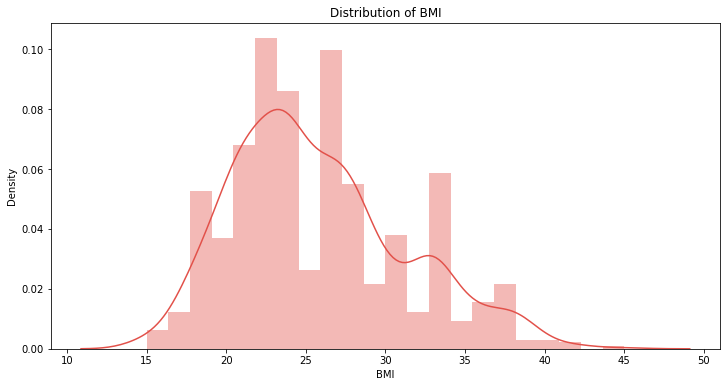

/Users/charlotteabitbol/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


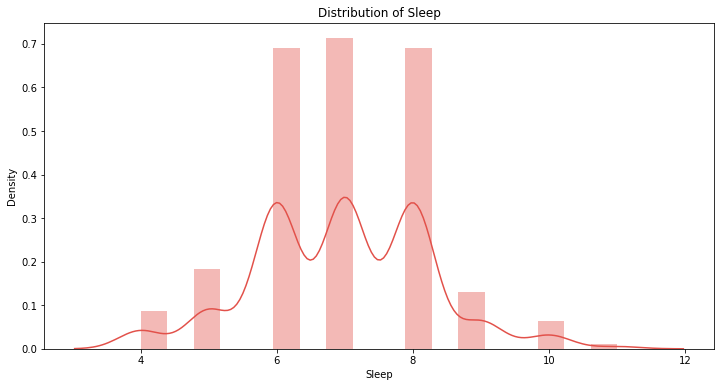

/Users/charlotteabitbol/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


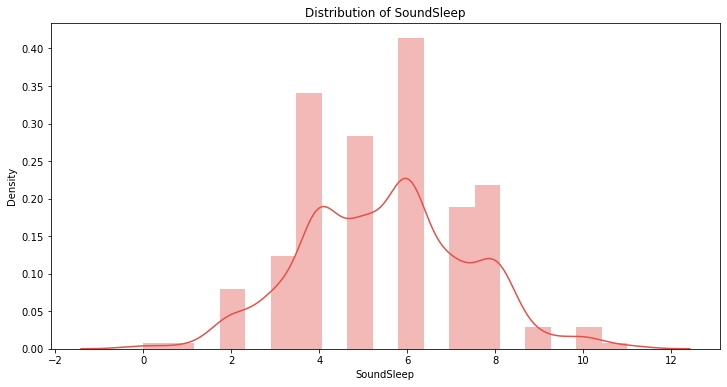

/Users/charlotteabitbol/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


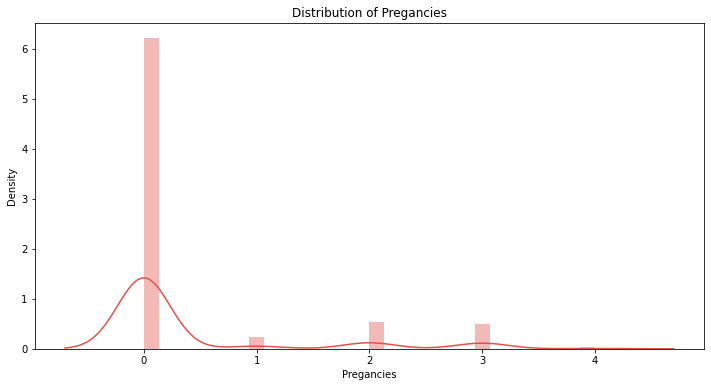

/Users/charlotteabitbol/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


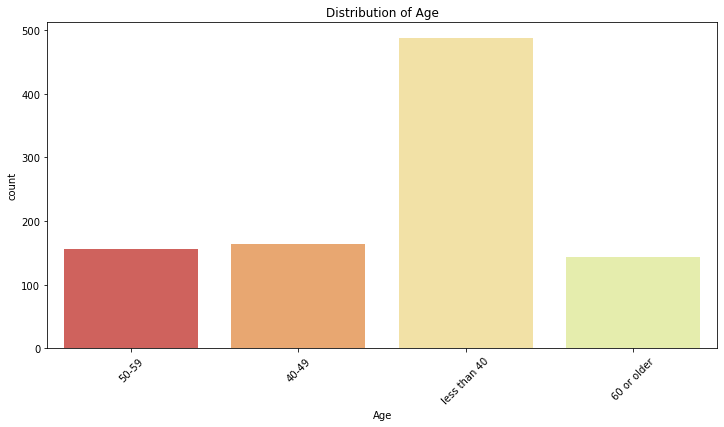

/Users/charlotteabitbol/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


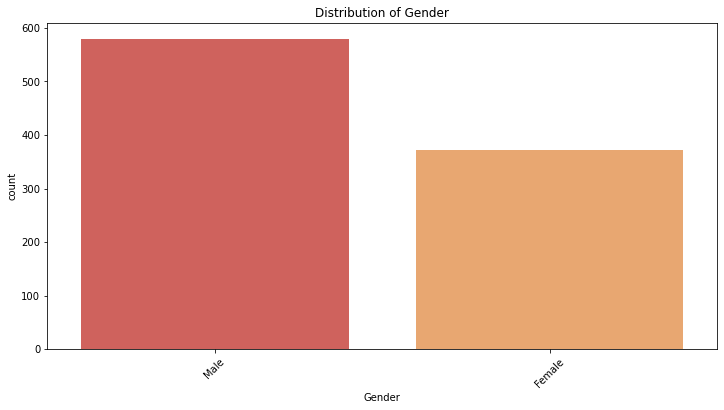

/Users/charlotteabitbol/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


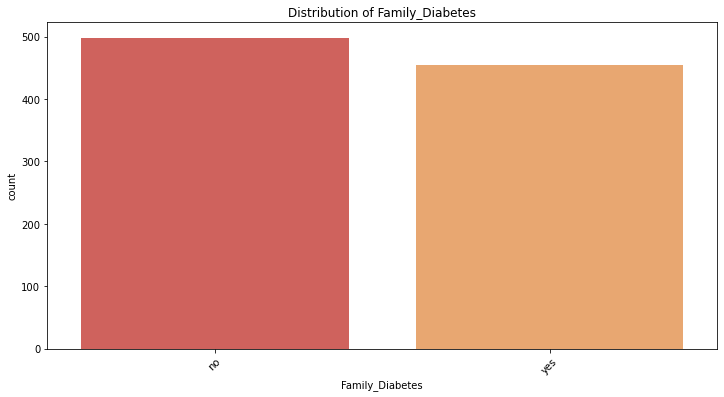

/Users/charlotteabitbol/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


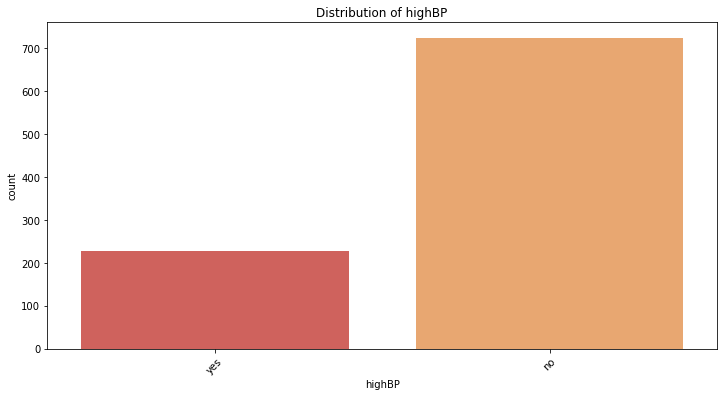

/Users/charlotteabitbol/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


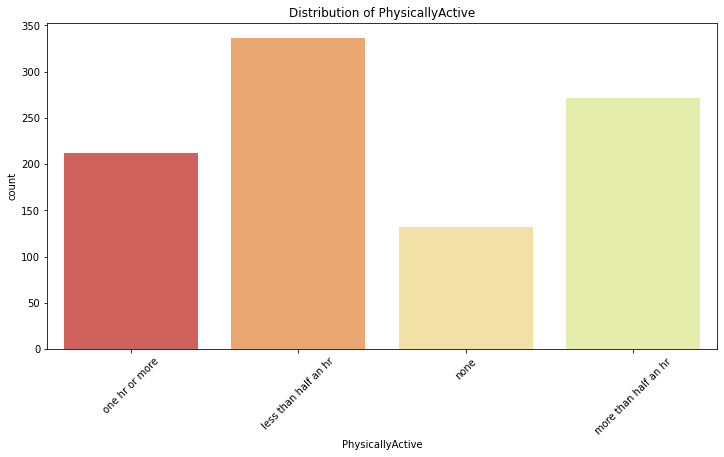

/Users/charlotteabitbol/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


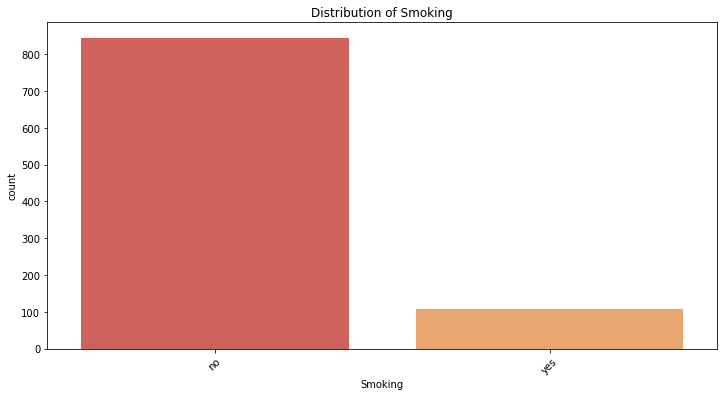

/Users/charlotteabitbol/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


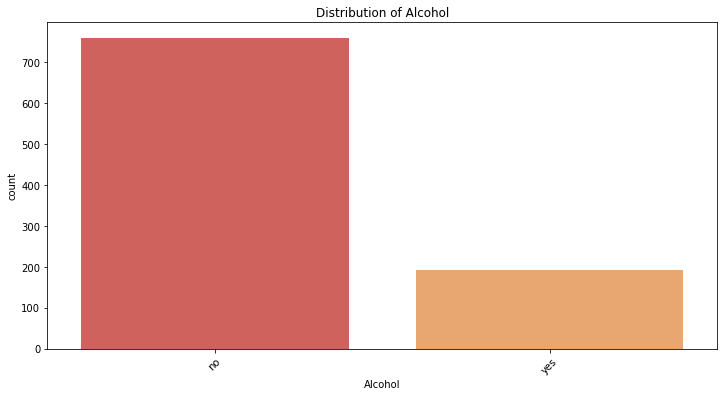

/Users/charlotteabitbol/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


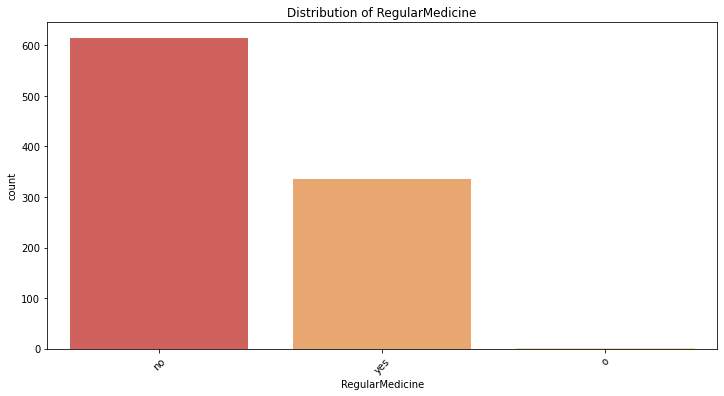

/Users/charlotteabitbol/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


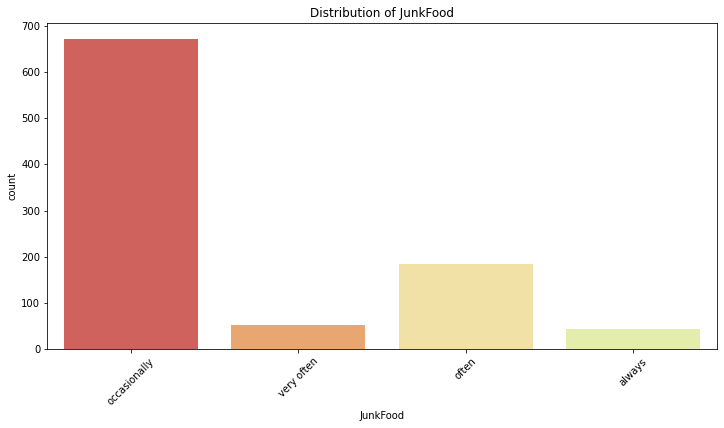

/Users/charlotteabitbol/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


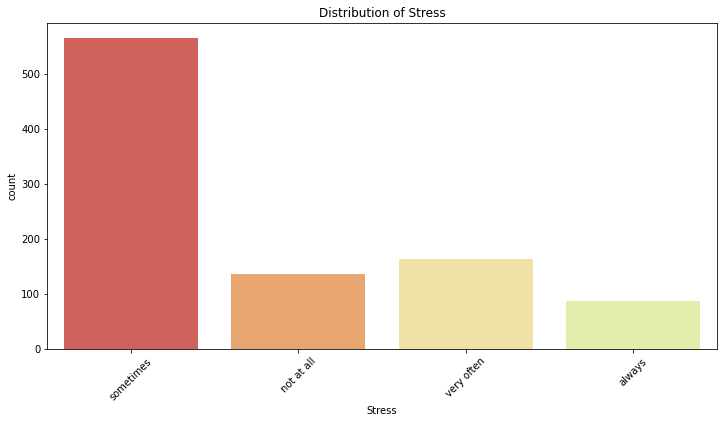

/Users/charlotteabitbol/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


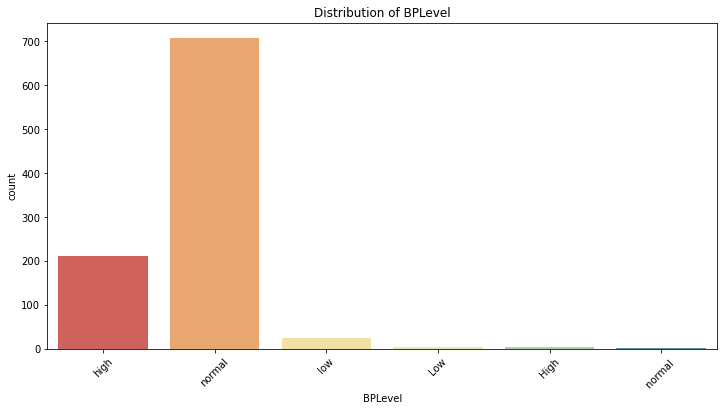

/Users/charlotteabitbol/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


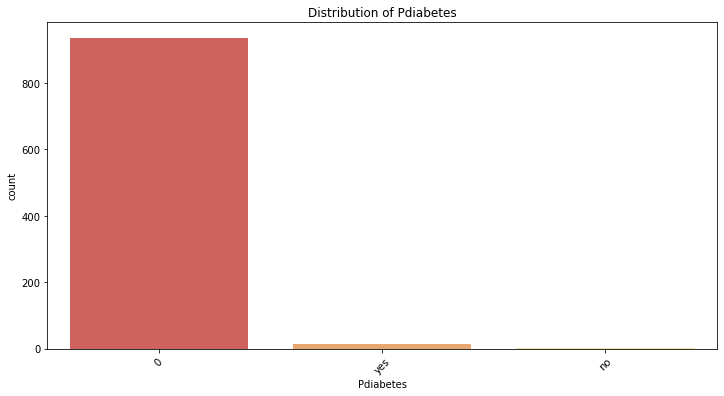

/Users/charlotteabitbol/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


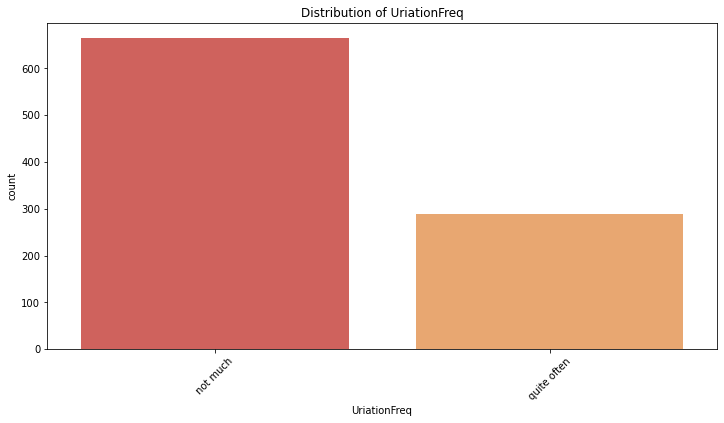

/Users/charlotteabitbol/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


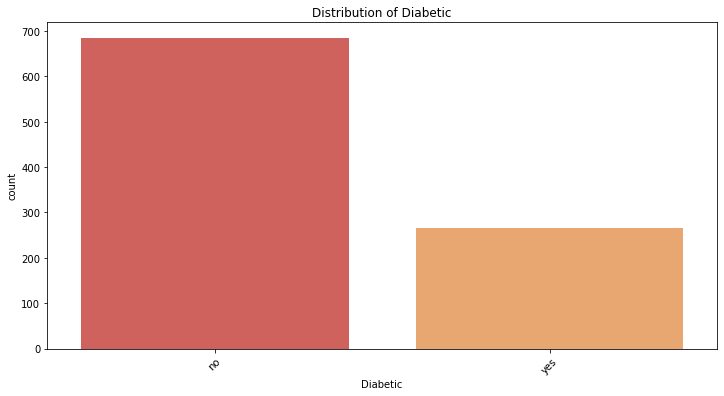

/Users/charlotteabitbol/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


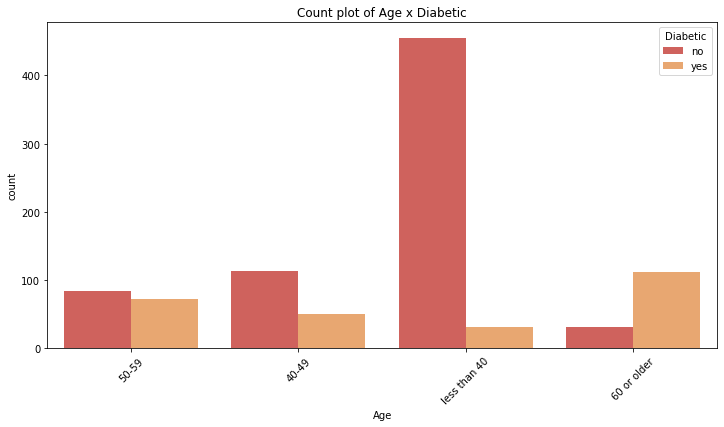

/Users/charlotteabitbol/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


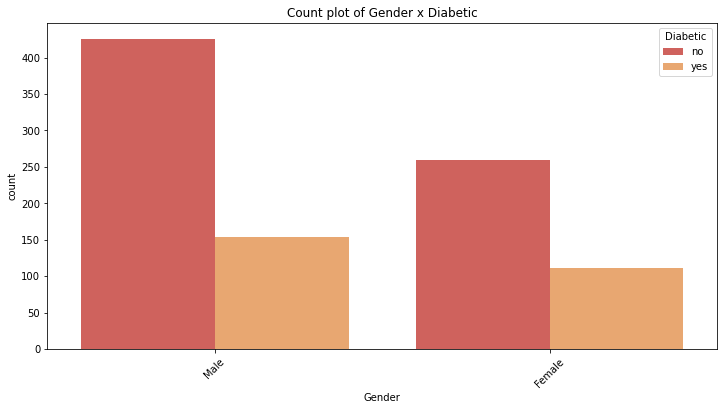

/Users/charlotteabitbol/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


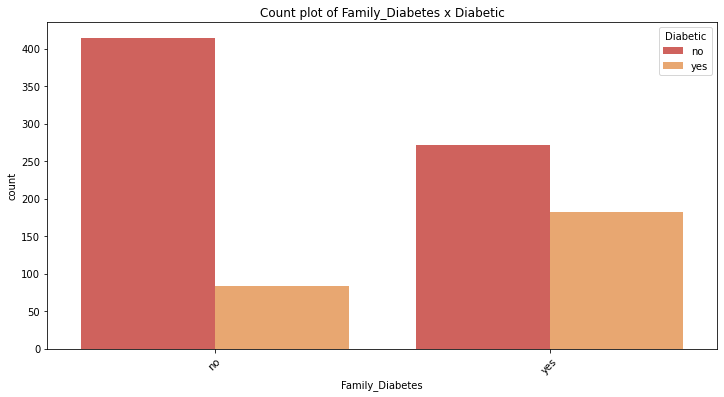

/Users/charlotteabitbol/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


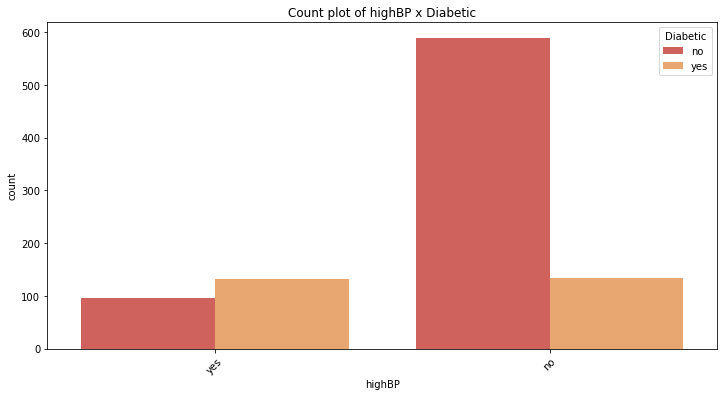

/Users/charlotteabitbol/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


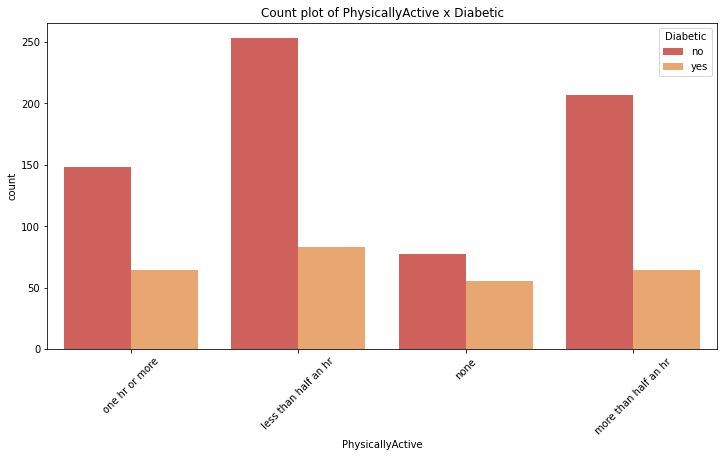

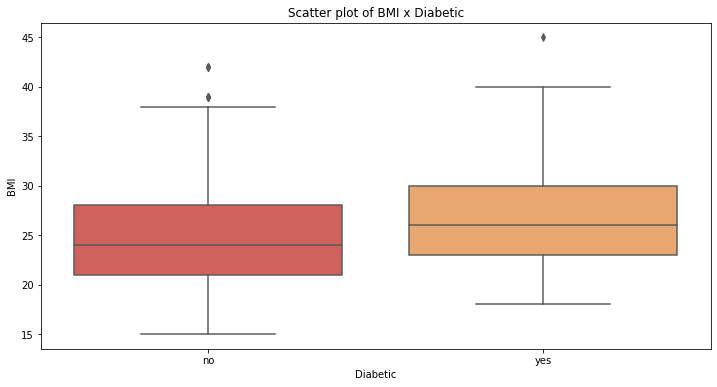

/Users/charlotteabitbol/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


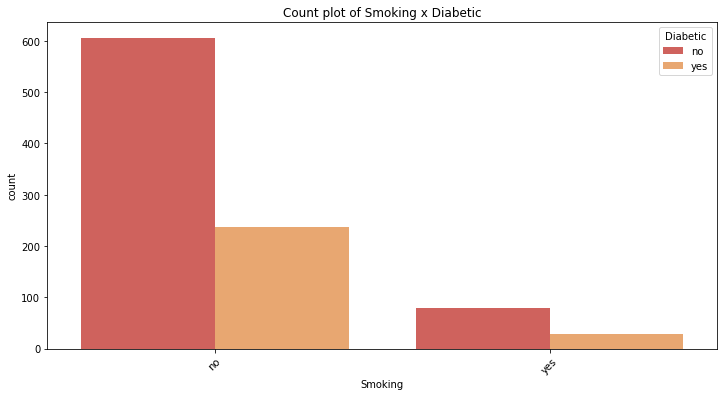

/Users/charlotteabitbol/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


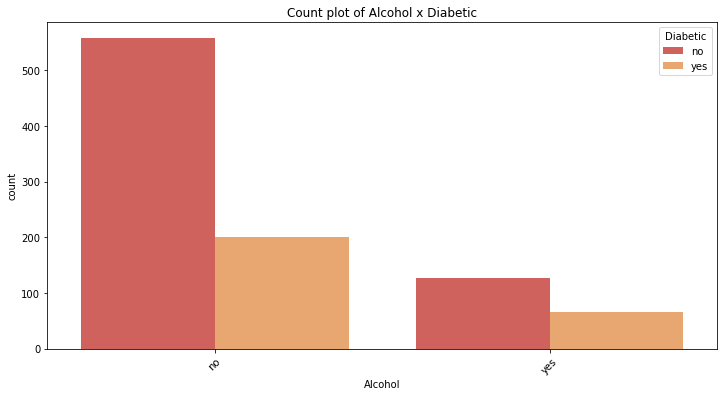

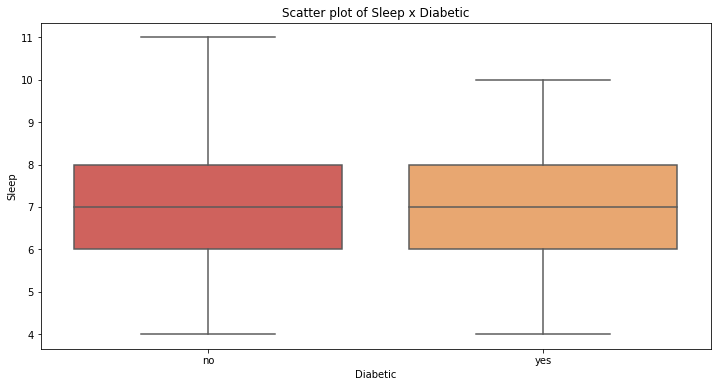

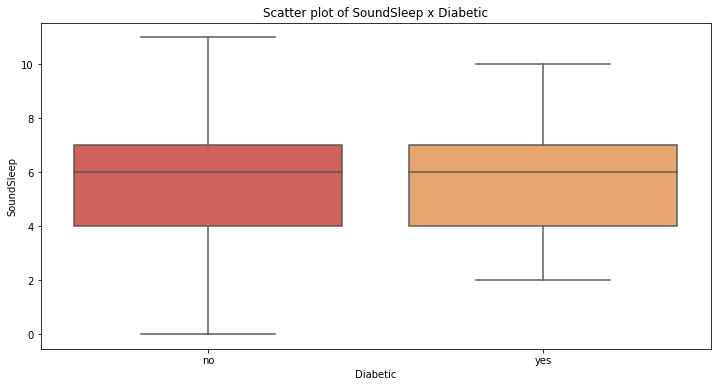

/Users/charlotteabitbol/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


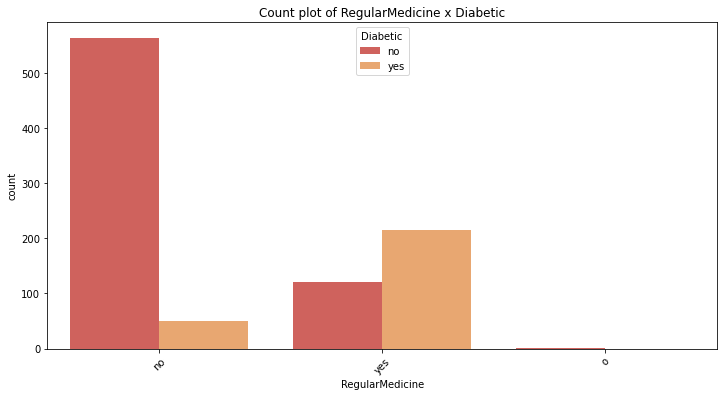

/Users/charlotteabitbol/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


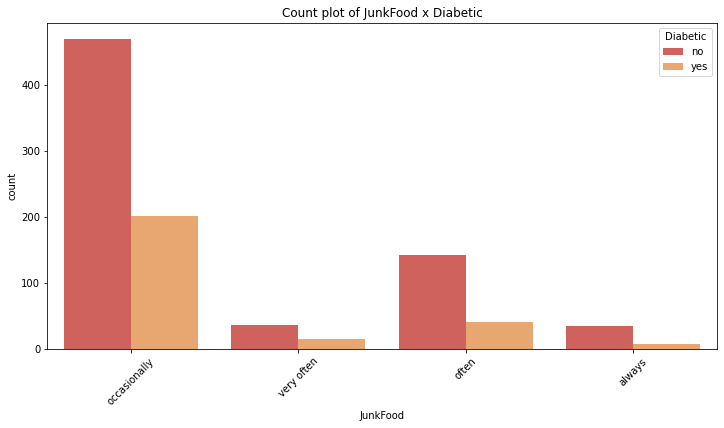

/Users/charlotteabitbol/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


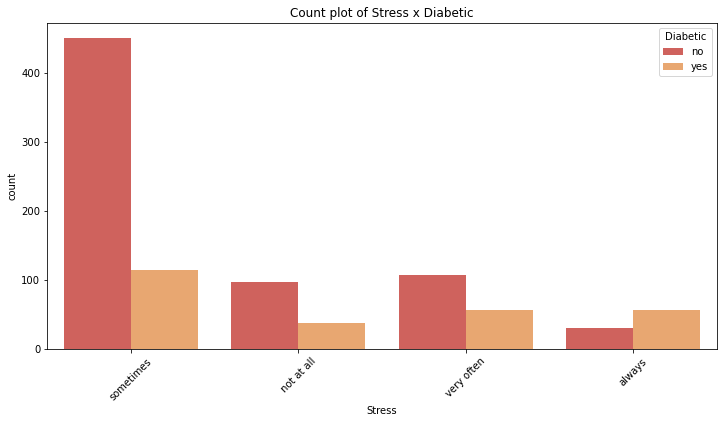

/Users/charlotteabitbol/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


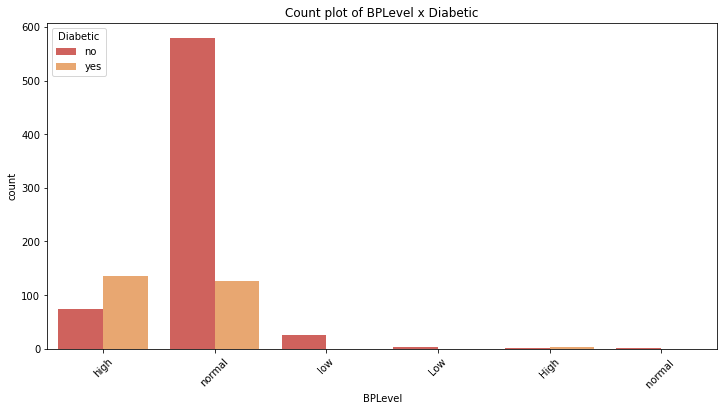

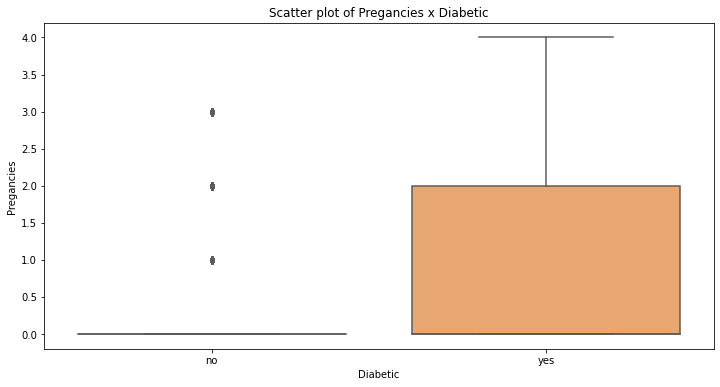

/Users/charlotteabitbol/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


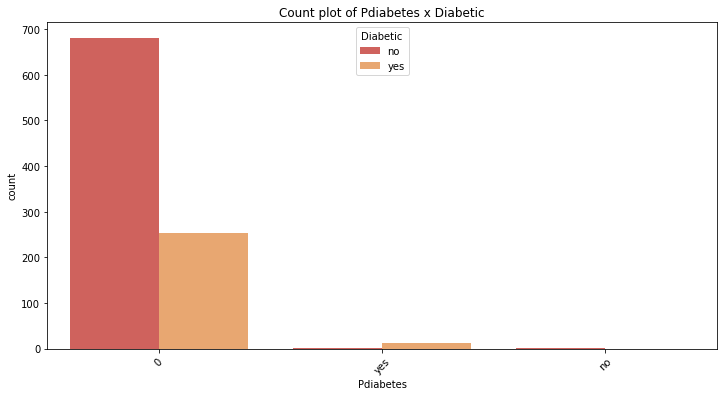

/Users/charlotteabitbol/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


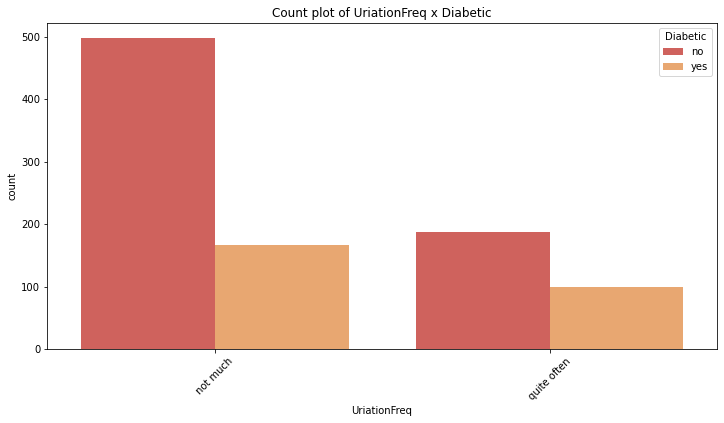

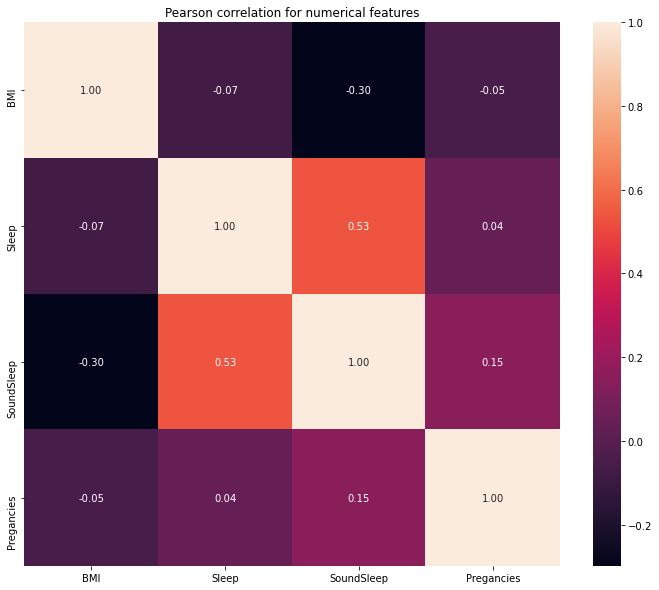

In [17]:
basic_eda(df, target)

# Split

In [18]:
X = df[features] 
y = df[target]

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, \
                                                    random_state=42)

In [20]:
print(X_train.shape[0]/len(df), X_test.shape[0]/len(df)) # proportion train / test for the split
print(set(X_train.index) & set(X_test.index)) # are train and test datasets overlapping ? 

0.7993697478991597 0.20063025210084034
set()


In [21]:
train_df = pd.concat([X_train[features], y_train], axis=1)
train_df.head()

,Age,Gender,Family_Diabetes,highBP,PhysicallyActive,BMI,Smoking,Alcohol,Sleep,SoundSleep,RegularMedicine,JunkFood,Stress,BPLevel,Pregancies,Pdiabetes,UriationFreq,Diabetic
318,less than 40,Male,no,no,one hr or more,24.0,no,no,7,7,no,often,sometimes,normal,0.0,0,not much,no
545,less than 40,Male,yes,yes,one hr or more,26.0,yes,yes,5,4,yes,often,not at all,high,0.0,0,not much,yes
557,60 or older,Male,no,no,more than half an hr,24.0,no,no,7,7,no,occasionally,sometimes,normal,0.0,0,quite often,yes
109,less than 40,Female,yes,no,one hr or more,24.0,no,no,8,8,no,often,sometimes,normal,0.0,0,not much,no
77,50-59,Female,no,yes,none,20.0,no,no,7,4,yes,occasionally,sometimes,high,1.0,0,not much,yes


In [22]:
test_df = pd.concat([X_test[features], y_test], axis =1)

# Preprocessing

## Missing values

In [23]:
column_with_nulls = np.array(train_df.columns[train_df.isnull().any()])
column_with_nulls

array(['BMI', 'Pregancies', 'Pdiabetes', 'Diabetic'], dtype=object)

In [24]:
{col : train_df[col].isnull().sum() for col in column_with_nulls} # number of missing values for each feature

{'BMI': 4, 'Pregancies': 34, 'Pdiabetes': 1, 'Diabetic': 1}

In [25]:
# copy of train_df to be safe
new_train = train_df.copy()

### BMI

In [26]:
train_df[train_df['BMI'].isnull()]

,Age,Gender,Family_Diabetes,highBP,PhysicallyActive,BMI,Smoking,Alcohol,Sleep,SoundSleep,RegularMedicine,JunkFood,Stress,BPLevel,Pregancies,Pdiabetes,UriationFreq,Diabetic
113,less than 40,Female,yes,no,more than half an hr,NaN,no,no,7,6,no,occasionally,not at all,normal,0.0,0,not much,NaN
116,less than 40,Female,no,no,more than half an hr,NaN,no,no,5,4,no,often,very often,normal,0.0,0,not much,no
122,less than 40,Male,no,yes,more than half an hr,NaN,no,no,6,6,no,occasionally,sometimes,normal,0.0,0,quite often,no
121,50-59,Female,yes,yes,none,NaN,no,no,6,3,yes,occasionally,always,high,2.0,0,not much,yes


BMI has quite a normal distribution but a bit right skewed so we could take the median to replace null values.

In [27]:
BMI_median = new_train['BMI'].median()
new_train['BMI'].fillna(BMI_median, inplace=True)

In [28]:
test_df['BMI'].fillna(BMI_median, inplace = True)

### Pregancies

In [29]:
Preg_median = new_train['Pregancies'].median()
Preg_median

0.0

In [30]:
train_df[train_df['Pregancies'].isnull()]

,Age,Gender,Family_Diabetes,highBP,PhysicallyActive,BMI,Smoking,Alcohol,Sleep,SoundSleep,RegularMedicine,JunkFood,Stress,BPLevel,Pregancies,Pdiabetes,UriationFreq,Diabetic
155,50-59,Female,no,no,more than half an hr,28.0,no,no,7,3,no,occasionally,sometimes,normal,NaN,0,quite often,no
148,less than 40,Male,no,no,one hr or more,23.0,no,no,7,5,no,occasionally,sometimes,normal,NaN,0,not much,no
172,60 or older,Female,yes,no,less than half an hr,38.0,no,no,5,2,yes,occasionally,very often,high,NaN,0,quite often,yes
144,40-49,Male,yes,no,more than half an hr,34.0,no,no,7,5,no,often,sometimes,normal,NaN,0,quite often,no
164,40-49,Male,no,no,less than half an hr,38.0,no,no,5,4,yes,occasionally,sometimes,normal,NaN,0,quite often,no
169,40-49,Female,yes,no,more than half an hr,36.0,no,no,7,3,yes,occasionally,sometimes,normal,NaN,0,quite often,no
140,less than 40,Female,yes,no,more than half an hr,24.0,no,no,8,8,yes,often,sometimes,normal,NaN,0,quite often,no
173,60 or older,Male,no,yes,less than half an hr,33.0,no,no,6,2,yes,occasionally,very often,high,NaN,0,quite often,yes
145,less than 40,Male,no,no,more than half an hr,30.0,no,no,7,4,no,occasionally,sometimes,normal,NaN,0,not much,no
176,less than 40,Male,yes,no,less than half an hr,32.0,no,no,6,4,no,often,sometimes,normal,NaN,0,quite often,no


Both male and female have missing values. \
Since median is 0 and that male have a 

In [31]:
new_train['Pregancies'] = new_train['Pregancies'].fillna(0)

In [32]:
test_df['Pregancies'].fillna(0, inplace = True)

### Pdiabetes

In [33]:
new_train[new_train['Pdiabetes'].isnull()]

,Age,Gender,Family_Diabetes,highBP,PhysicallyActive,BMI,Smoking,Alcohol,Sleep,SoundSleep,RegularMedicine,JunkFood,Stress,BPLevel,Pregancies,Pdiabetes,UriationFreq,Diabetic
134,less than 40,Male,yes,no,one hr or more,20.0,no,no,7,6,no,occasionally,not at all,normal,0.0,NaN,not much,no


In [34]:
new_train['Pdiabetes'].value_counts()

0      750
yes     10
Name: Pdiabetes, dtype: int64

In [35]:
new_train['Pdiabetes'].fillna('0', inplace=True)

In [36]:
test_df['Pdiabetes'].fillna('0', inplace = True)

### Diabetic

In [37]:
new_train[new_train['Diabetic'].isnull()]

,Age,Gender,Family_Diabetes,highBP,PhysicallyActive,BMI,Smoking,Alcohol,Sleep,SoundSleep,RegularMedicine,JunkFood,Stress,BPLevel,Pregancies,Pdiabetes,UriationFreq,Diabetic
113,less than 40,Female,yes,no,more than half an hr,25.0,no,no,7,6,no,occasionally,not at all,normal,0.0,0,not much,NaN


In [38]:
new_train = new_train.dropna(subset=['Diabetic'])

In [39]:
column_with_nulls = np.array(new_train.columns[new_train.isnull().any()])
column_with_nulls

array([], dtype=object)

In [40]:
train_df = new_train

## Outliers

In [41]:
for feature in cat_features:
    print(f'{feature}','\n', train_df[feature].value_counts(normalize = True), '\n')

Age 
 less than 40    0.518421
40-49           0.178947
50-59           0.156579
60 or older     0.146053
Name: Age, dtype: float64 

Gender 
 Male      0.607895
Female    0.392105
Name: Gender, dtype: float64 

Family_Diabetes 
 no     0.531579
yes    0.468421
Name: Family_Diabetes, dtype: float64 

highBP 
 no     0.759211
yes    0.240789
Name: highBP, dtype: float64 

PhysicallyActive 
 less than half an hr    0.363158
more than half an hr    0.280263
one hr or more          0.214474
none                    0.142105
Name: PhysicallyActive, dtype: float64 

Smoking 
 no     0.886842
yes    0.113158
Name: Smoking, dtype: float64 

Alcohol 
 no     0.8
yes    0.2
Name: Alcohol, dtype: float64 

RegularMedicine 
 no     0.657895
yes    0.340789
o      0.001316
Name: RegularMedicine, dtype: float64 

JunkFood 
 occasionally    0.707895
often           0.192105
very often      0.056579
always          0.043421
Name: JunkFood, dtype: float64 

Stress 
 sometimes     0.592105
very often    

In [42]:
train_df['RegularMedicine'] = train_df['RegularMedicine'].replace('o', 'no')

In [43]:
train_df['BPLevel'].value_counts()

normal     565
high       166
low         22
High         5
normal       1
Low          1
Name: BPLevel, dtype: int64

In [44]:
train_df['BPLevel'] = train_df['BPLevel'].replace('High', 'high')

In [45]:
train_df['BPLevel'] = train_df['BPLevel'].replace('Low', 'low')

In [46]:
train_df['BPLevel'] = train_df['BPLevel'].replace('normal ', 'normal')

In [47]:
train_df['BPLevel'].value_counts()

normal    566
high      171
low        23
Name: BPLevel, dtype: int64